In [1]:
### Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Crimes.csv')

In [3]:
df.shape

(161942, 14)

In [4]:
### Check for duplicates and remove if any are present it means ID and Case Number are same then we can drop those rows.

In [5]:
df.drop_duplicates(['ID', 'Case Number'], inplace=True)

In [6]:
df.shape ## No Duplicates

(161942, 14)

In [7]:
### check for null values
df.isna().sum() ### Location Description has null values

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    569
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      7
Community Area            0
dtype: int64

In [8]:
df.index=pd.to_datetime(df.Date)

In [9]:
df.drop(['ID','Case Number'],axis=1,inplace=True)

In [10]:
df.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
Date,,,,,,,,,,,,
2019-08-17 23:59:00,8/17/19 23:59,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15
2019-08-17 23:59:00,8/17/19 23:59,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44
2019-08-17 23:57:00,8/17/19 23:57,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63
2019-08-17 23:55:00,8/17/19 23:55,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46
2019-08-17 23:45:00,8/17/19 23:45,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46


In [11]:
### As mentioned we have to consider only Location Description street

In [12]:
# df=df[df['Location Description']=="STREET"] ## Taking only street location.

In [17]:
# Convert Categorical Attributes to Numerical
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]

In [18]:
df['Primary Type'].value_counts() #### Case type wise counts

THEFT                                38203
BATTERY                              31728
CRIMINAL DAMAGE                      16806
ASSAULT                              13219
OTHER OFFENSE                        10761
DECEPTIVE PRACTICE                   10630
NARCOTICS                             8767
BURGLARY                              5824
MOTOR VEHICLE THEFT                   5712
ROBBERY                               4903
CRIMINAL TRESPASS                     4298
WEAPONS VIOLATION                     4063
OFFENSE INVOLVING CHILDREN            1478
INTERFERENCE WITH PUBLIC OFFICER      1016
PUBLIC PEACE VIOLATION                1003
CRIM SEXUAL ASSAULT                    996
SEX OFFENSE                            771
PROSTITUTION                           455
HOMICIDE                               311
ARSON                                  222
LIQUOR LAW VIOLATION                   146
STALKING                               141
CONCEALED CARRY LICENSE VIOLATION      133
KIDNAPPING 

In [31]:
df.groupby(['Block'])['Primary Type'].count() #Blockwise number of crimes

Block
0         3
1        15
2         5
3        11
4        10
         ..
25017     1
25018     1
25019     1
25020     1
25021     1
Name: Primary Type, Length: 25022, dtype: int64

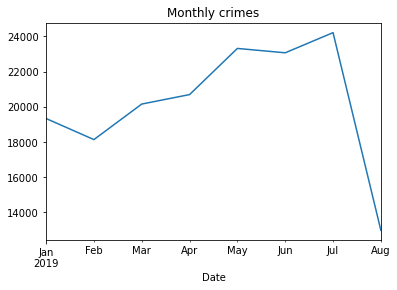

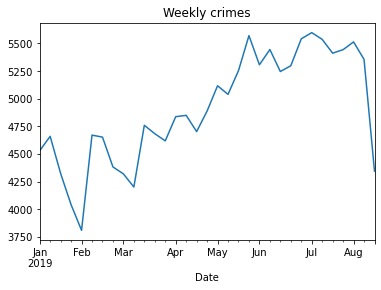

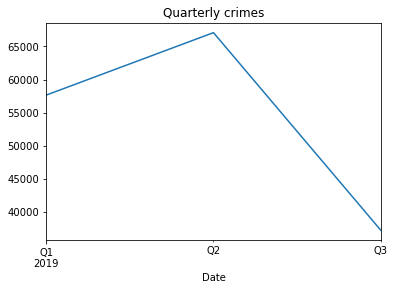

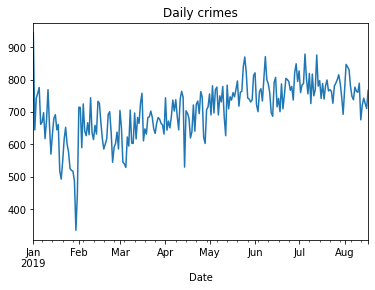

In [38]:
####### Number of crimes monthly,weekly,daily in 2019.
plt.subplot()
df['Primary Type'].resample('M').count().plot()
plt.title('Monthly crimes')
plt.show()
# Weekly arrest
df['Primary Type'].resample('W').count().plot()
plt.title('Weekly crimes')
plt.show()
### Quarterly arrest
df['Primary Type'].resample('Q').count().plot()
plt.title('Quarterly crimes')
plt.show()
plt.show()

# daily arrest
df['Primary Type'].resample('D').count().plot()
plt.title('Daily crimes')
plt.show()
plt.show()


In [39]:
### Arrested 
arrested_df=df[df['Arrest'] == True]
arrested_df.groupby(['Block'])['Arrest'].count()

Block
0        1
1        2
2        2
3        2
4        2
        ..
24961    1
24981    1
24990    1
24992    1
25003    1
Name: Arrest, Length: 11444, dtype: int64

In [40]:
arrested_df.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
Date,,,,,,,,,,,,
2019-08-17 23:59:00,8/17/19 23:59,0,0,THEFT,0,0,True,False,1633,16,36.0,15
2019-08-17 23:45:00,8/17/19 23:45,4,3,BATTERY,3,2,True,False,411,4,8.0,46
2019-08-17 23:42:00,8/17/19 23:42,5,4,ASSAULT,4,2,True,False,1414,14,1.0,22
2019-08-17 23:39:00,8/17/19 23:39,8,6,NARCOTICS,6,2,True,False,1821,18,27.0,8
2019-08-17 23:24:00,8/17/19 23:24,13,2,WEAPONS VIOLATION,2,0,True,False,1135,11,28.0,27


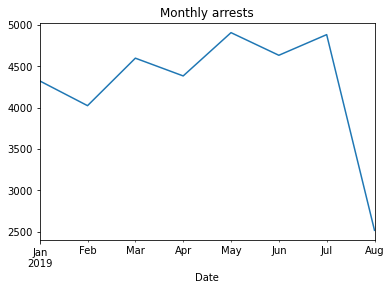

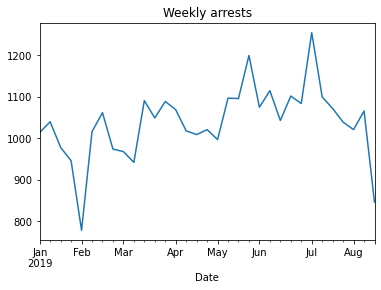

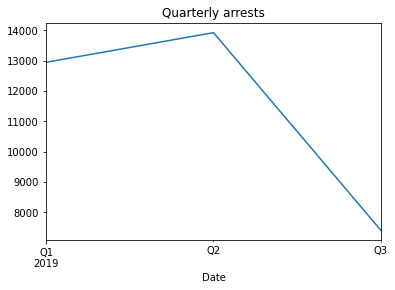

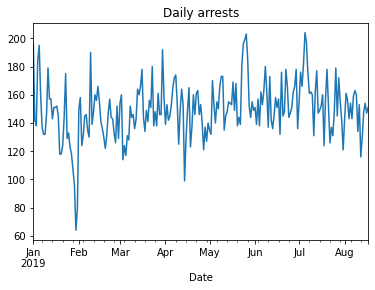

In [41]:
####### Number of Arrested cases monthly,weekly,daily in 2019.
plt.subplot()
arrested_df['Arrest'].resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()
# Weekly arrest
arrested_df['Arrest'].resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()
### Quarterly arrest
arrested_df['Arrest'].resample('Q').sum().plot()
plt.title('Quarterly arrests')
plt.show()
plt.show()

# daily arrest
arrested_df['Arrest'].resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()


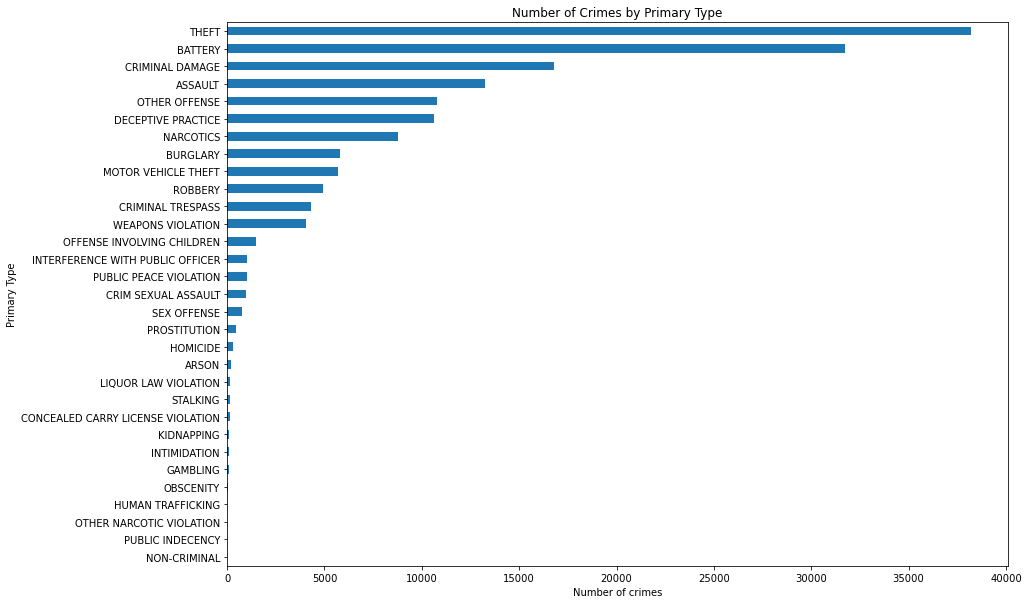

In [42]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Number of Crimes by Primary Type')
plt.xlabel('Number of crimes')
plt.ylabel('Primart Type')
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [43]:
### We can see that the classes are imbalanced. Let's group less occured primary Types into Others

In [48]:
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()

In [49]:
all_classes

,Primary Type,Block
0,ARSON,222
1,ASSAULT,13219
2,BATTERY,31728
3,BURGLARY,5824
4,CONCEALED CARRY LICENSE VIOLATION,133
5,CRIM SEXUAL ASSAULT,996
6,CRIMINAL DAMAGE,16806
7,CRIMINAL TRESPASS,4298
8,DECEPTIVE PRACTICE,10630
9,GAMBLING,92


In [50]:
all_classes['count'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['count'], ascending=[False])
minority_classes = all_classes.tail(13)
minority_classes

,Primary Type,count
10,HOMICIDE,311
0,ARSON,222
15,LIQUOR LAW VIOLATION,146
28,STALKING,141
4,CONCEALED CARRY LICENSE VIOLATION,133
14,KIDNAPPING,112
13,INTIMIDATION,103
9,GAMBLING,92
19,OBSCENITY,31
11,HUMAN TRAFFICKING,8


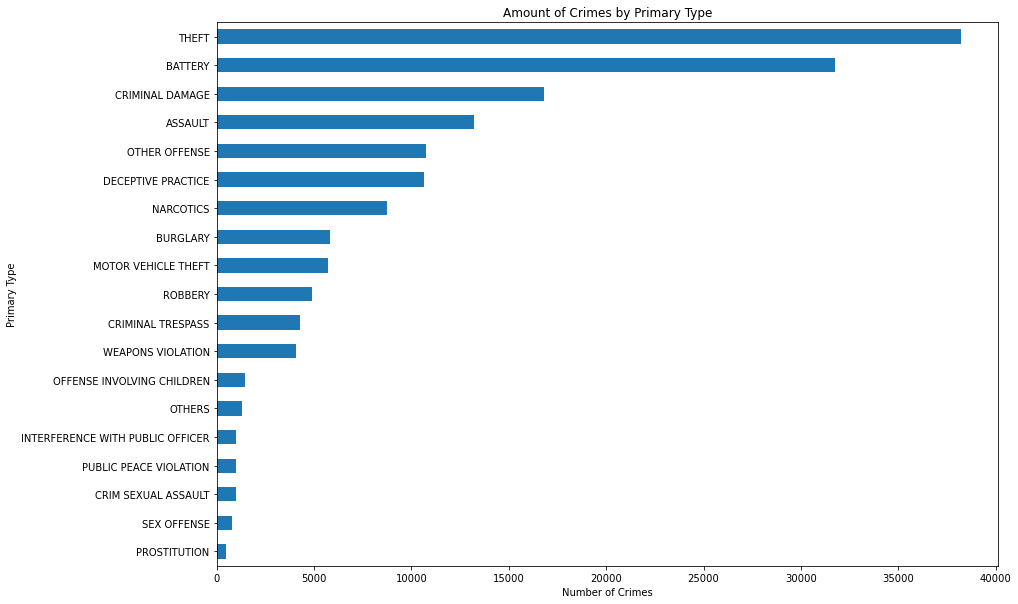

In [51]:
# After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(minority_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [53]:
classes = df['Primary Type'].unique()
classes

array(['THEFT', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BATTERY',
       'ASSAULT', 'NARCOTICS', 'ROBBERY', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'SEX OFFENSE', 'BURGLARY', 'CRIM SEXUAL ASSAULT',
       'OTHERS', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'PUBLIC PEACE VIOLATION', 'PROSTITUTION'],
      dtype=object)

In [54]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [55]:
##### As mentioned, I am using Filter Method for Feature selection and using Pearson correlation
#A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
#A value closer to 1 implies stronger positive correlation
#A value closer to -1 implies stronger negative correlation

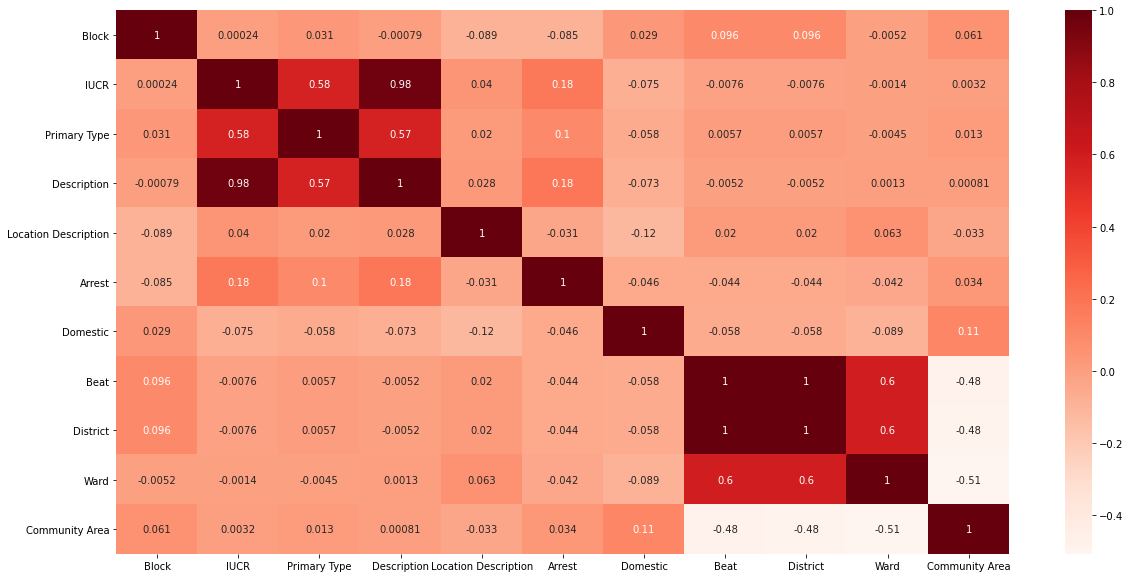

In [59]:
# Split Dataframe to target class and features
x_fs = df.drop(['Primary Type'], axis=1)
y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [61]:
cor_target = cor['Primary Type']
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.575821
Primary Type    1.000000
Description     0.571929
Name: Primary Type, dtype: float64

In [62]:
#### So now we will select IUCR,Primary Type,Description 

In [63]:
# Model Building Random Forest Model

In [64]:
from sklearn.model_selection import train_test_split

In [101]:
Features=['IUCR','Description']
Target='Primary Type'

In [102]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description']
Target Class        :  Primary Type
Training Set Size   :  (129553, 12)
Test Set Size       :  (32389, 12)


In [103]:
# Random Forest
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from sklearn.ensemble import RandomForestClassifier,VotingClassifier

# Evaluation Metrics
from sklearn import metrics
rf_model = RandomForestClassifier(n_estimators=100, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(x1,x2)

RandomForestClassifier(max_depth=50, min_samples_leaf=25, min_samples_split=30)

In [104]:
# Prediction
result = rf_model.predict(y[Features])
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Random Forest Results ==========
Accuracy    :  0.9933310691901571
Recall      :  0.9933310691901571
Precision   :  0.9934484968649001
F1 Score    :  0.9933310691901571


C:\Users\sidre\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


================= Classification Report =================

                                  precision    recall  f1-score   support

                           THEFT       1.00      1.00      1.00      7880
                 CRIMINAL DAMAGE       1.00      1.00      1.00      3399
               WEAPONS VIOLATION       1.00      0.99      0.99       872
                         BATTERY       1.00      1.00      1.00      6281
                         ASSAULT       0.99      0.99      0.99      2545
                       NARCOTICS       0.98      0.99      0.99      1752
                         ROBBERY       0.99      0.98      0.99       990
             MOTOR VEHICLE THEFT       0.99      0.99      0.99      1108
                   OTHER OFFENSE       0.99      0.99      0.99      2136
                     SEX OFFENSE       0.98      0.96      0.97       164
                        BURGLARY       1.00      1.00      1.00      1114
             CRIM SEXUAL ASSAULT       1.00      0.9

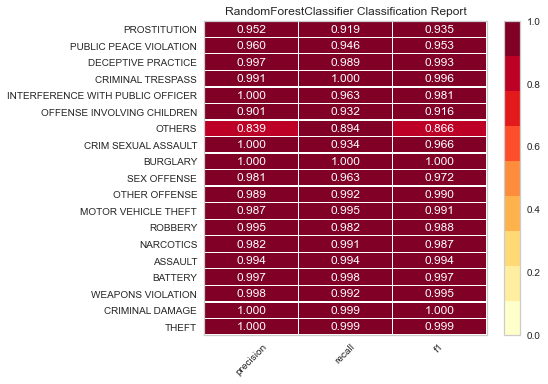

In [105]:
#Classification Report
from yellowbrick.classifier import ClassificationReport

target_names = Classes
visualizer =ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             


In [113]:
##### Hyper Parameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV
n_estimators = [50,100, 200]
max_depth = [40,50,60]
min_samples_split = [30,40,50]
min_samples_leaf = [20,25,50] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
forest = RandomForestClassifier(random_state = 1)
gridF = GridSearchCV(forest, hyperF, cv = 2, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x1,x2)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  7.1min finished


In [119]:
bestF

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60],
                         'min_samples_leaf': [20, 25, 50],
                         'min_samples_split': [30, 40, 50],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [114]:
# Prediction
result = bestF.predict(y[Features])
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Random Forest Results ==========
Accuracy    :  0.9943190589397635
Recall      :  0.9943190589397635
Precision   :  0.9943489895125986
F1 Score    :  0.9943190589397635


C:\Users\sidre\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


================= Classification Report =================

                                  precision    recall  f1-score   support

                           THEFT       1.00      1.00      1.00      7880
                 CRIMINAL DAMAGE       1.00      1.00      1.00      3399
               WEAPONS VIOLATION       1.00      0.99      1.00       872
                         BATTERY       1.00      1.00      1.00      6281
                         ASSAULT       0.99      1.00      0.99      2545
                       NARCOTICS       0.99      0.99      0.99      1752
                         ROBBERY       0.99      0.98      0.99       990
             MOTOR VEHICLE THEFT       0.99      1.00      1.00      1108
                   OTHER OFFENSE       0.99      0.99      0.99      2136
                     SEX OFFENSE       0.96      0.99      0.98       164
                        BURGLARY       1.00      1.00      1.00      1114
             CRIM SEXUAL ASSAULT       1.00      0.9

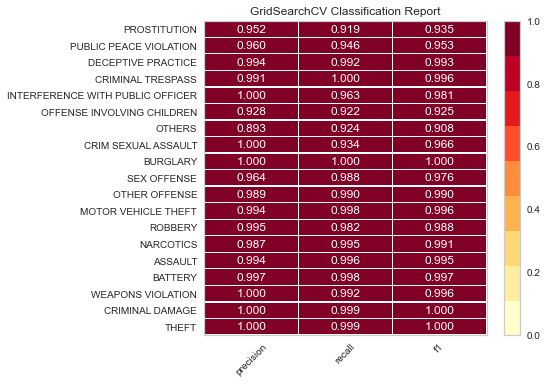

In [115]:
#Classification Report
from yellowbrick.classifier import ClassificationReport

target_names = Classes
visualizer =ClassificationReport(bestF, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()       